In [1]:
import os
import pandas as pd
from pickle import load
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams.update({'font.size': 15})

In [2]:
files = os.listdir('results')
seeds = []
bs = []
acc = []
sp = []
opttype = []
acc1 = []
acc0 = []

In [3]:
for file in files:
    if file[0]=='.':
        continue
    if 'path' in file:
        continue
    with open(os.path.join('results', file), 'rb') as handle:
        try:
            f = load(handle)
            if 'noreg' not in file:
                seeds.append(int(file.split('_')[2][-1]))
                bs.append(int(file.split('_')[3].split('.')[0][2:]))
                acc.append(f['accuracy'])
                acc1.append(f['accuracy1'])
                acc0.append(f['accuracy0'])
                sp.append(f['statistical_parity_classification'])
                opttype.append(file.split('_')[1])
            else:
                seeds.append(int(file.split('_')[1][-1]))
                bs.append(int(file.split('_')[2][2:]))
                acc.append(f['accuracy'])
                acc1.append(f['accuracy1'])
                acc0.append(f['accuracy0'])
                sp.append(f['statistical_parity_classification'])
                opttype.append('noreg')
        except:
            print(file)
            continue

In [4]:
df = pd.DataFrame(data={
    'seeds':seeds,
    'Batchsize':bs,
    'Accuracy':np.array(acc)/100,
    'SP':np.array(sp),
    'opttype':opttype,
    'acc1':acc1,
    'acc0':acc0,
})

In [5]:
titles = {
    'biasedCEL' : 'Unbiased Energy Distance, Biased Classification Loss',
    'fullbias' : 'Biased Energy Distance, Biased Classification Loss',
    'debiased' : 'Unbiased Energy Distance, Unbiased Classification Loss',
}

Errorbar measuring error of mean
debiased


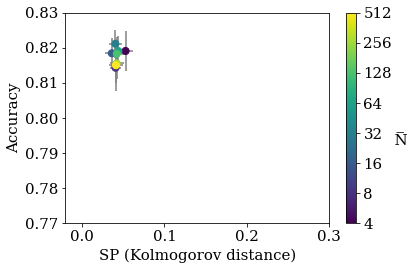

fullbias


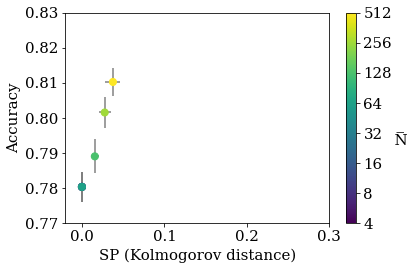

noreg


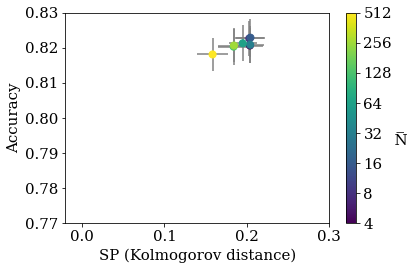

In [7]:
print('Errorbar measuring error of mean')
for opt in df.opttype.unique():
    print(opt)
    dfloc = df.loc[df.opttype==opt].dropna()
    meandf = dfloc.groupby('Batchsize').mean()
    stddf = dfloc.groupby('Batchsize').std()
    plt.errorbar(meandf.SP, meandf.Accuracy, xerr=stddf.SP/np.sqrt(10), yerr=stddf.Accuracy/np.sqrt(10), fmt=".", color='gray')
    plt.scatter(meandf.SP, meandf.Accuracy, c=np.log2(meandf.index),zorder=4, s=50)
    #plt.xlim(-2/100, 7.5/100)
    #plt.ylim(77/100, 83/100)
    plt.xlim(-2/100, 30/100)
    plt.ylim(77/100, 83/100)
    plt.xlabel('SP (Kolmogorov distance)')
    plt.ylabel('Accuracy')
    cbar = plt.colorbar(ticks=np.log2([4, 8, 16, 32, 64, 128, 256, 512]))
    cbar.ax.set_yticklabels([4, 8, 16, 32, 64, 128, 256, 512])
    cbar.ax.set_ylabel('  _\n  N', rotation=0)
    #plt.title(titles[opt])
    plt.tight_layout()
    plt.savefig(os.path.join('plots',opt+'uncertainty.pdf'))
    plt.show()